# Python для анализа данных

*Алла Тамбовцева, НИУ ВШЭ*

### Основы работы с библиотекой `matplotlib`

С библиотекой `matplotlib` мы уже сталкивались, когда строили статистические графики на основе данных из датафреймов `pandas`. Но с помощью `matplotlib` можно строить не только гистограммы, графики плотности и диаграммы рассеяния, но и вообще любые графики. 

Для начала построим простенький график для визуализации данных в двух списках. Импортируем модуль pyplot из библиотеки и добавим питоновскую «магическую» строчку для того, чтобы графики отображались прямо в ipynb-файле.

In [1]:
import matplotlib.pyplot as plt
% matplotlib inline

Создадим два небольших списка.

In [2]:
X = [-2, -0.5, 0, 2, 5, 8, 9, 10]
Y = [4, 0.25, 0, 4, 25, 64, 81, 100]

Построим график.

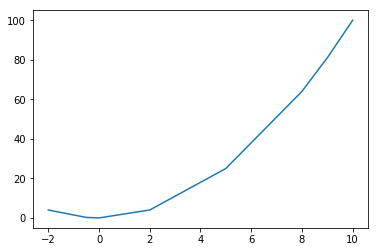

In [3]:
plt.plot(X, Y)

Как можно заметить, в списке `Y` сохранены элементы списка `X`, возведенные в квадрат. Однако наш график не похож на ветвь параболы, он какой-то угловатый. Это нормально, потому что в списках у нас всего по 8 элементов, то есть, всего 8 точек на графике соединяются линиями. Если бы точек было больше, график был бы более гладким. Воспользуемся функцией `linspace` из библиотеки `numpy` (вот она нам и пригодилась!).

In [4]:
import numpy as np

In [5]:
x = np.linspace(-2, 10, 100) # 100 точек
x

array([-2.        , -1.87878788, -1.75757576, -1.63636364, -1.51515152,
       -1.39393939, -1.27272727, -1.15151515, -1.03030303, -0.90909091,
       -0.78787879, -0.66666667, -0.54545455, -0.42424242, -0.3030303 ,
       -0.18181818, -0.06060606,  0.06060606,  0.18181818,  0.3030303 ,
        0.42424242,  0.54545455,  0.66666667,  0.78787879,  0.90909091,
        1.03030303,  1.15151515,  1.27272727,  1.39393939,  1.51515152,
        1.63636364,  1.75757576,  1.87878788,  2.        ,  2.12121212,
        2.24242424,  2.36363636,  2.48484848,  2.60606061,  2.72727273,
        2.84848485,  2.96969697,  3.09090909,  3.21212121,  3.33333333,
        3.45454545,  3.57575758,  3.6969697 ,  3.81818182,  3.93939394,
        4.06060606,  4.18181818,  4.3030303 ,  4.42424242,  4.54545455,
        4.66666667,  4.78787879,  4.90909091,  5.03030303,  5.15151515,
        5.27272727,  5.39393939,  5.51515152,  5.63636364,  5.75757576,
        5.87878788,  6.        ,  6.12121212,  6.24242424,  6.36

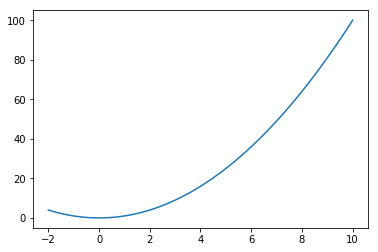

In [6]:
plt.plot(x, x**2)

Так график больше похож на параболу. Могли бы изобразить её полностью, определённую на участке от $-10$ до $10$.

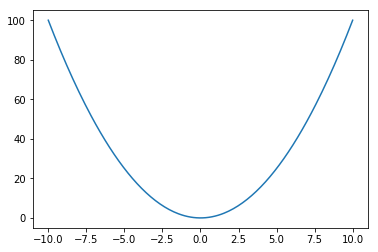

In [7]:
x = np.linspace(-10, 10, 200)
plt.plot(x, x**2)

Поменяем цвет линии по умолчанию на какой-нибудь другой.

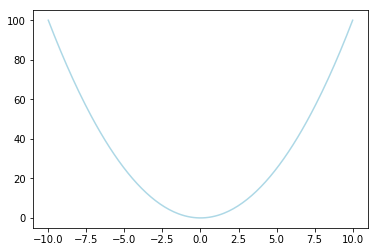

In [8]:
plt.plot(x, x**2, 'lightblue')

Или так:

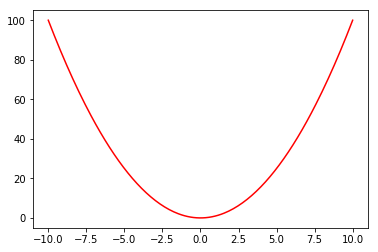

In [9]:
plt.plot(x, x**2, 'red')

Список цветов в Python см. [здесь](https://matplotlib.org/users/colors.html). 

Теперь изменим тип линии. По умолчанию используется сплошная линия, но её можно заменить на пунктирную или что-то подобное:

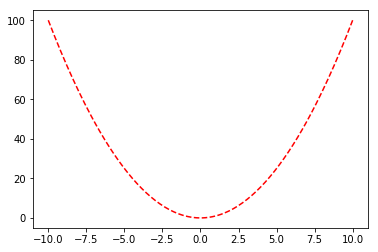

In [10]:
plt.plot(x, x**2, 'red', linestyle = '--')

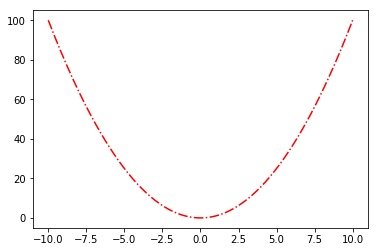

In [11]:
plt.plot(x, x**2, 'red', linestyle = '-.')

Список всех типов линий см. [здесь](https://matplotlib.org/gallery/lines_bars_and_markers/line_styles_reference.html). 

Кроме того, можно изменить толщину линии, добавив аргумент `linewidth`.

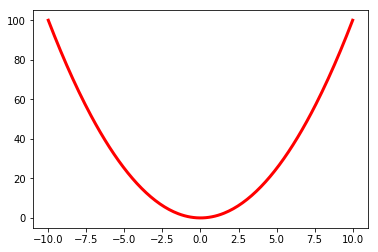

In [12]:
plt.plot(x, x**2, 'red', linewidth = 3)

Теперь построим график, состоящий только из точек (можно считать диаграммой рассеяния).

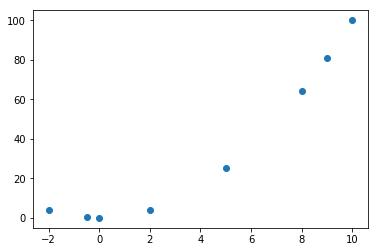

In [13]:
plt.scatter(X, Y)

Теперь будем менять цвет точек и тип точек (тип маркера) одновременно.

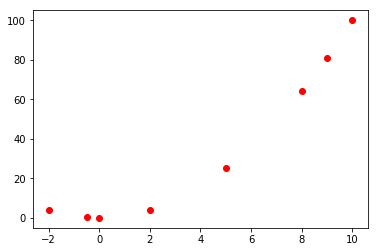

In [14]:
plt.scatter(X, Y, color ='red', marker = 'o')

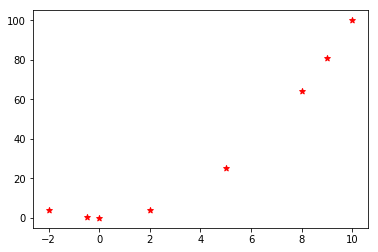

In [15]:
plt.scatter(X, Y, color ='red', marker = '*')

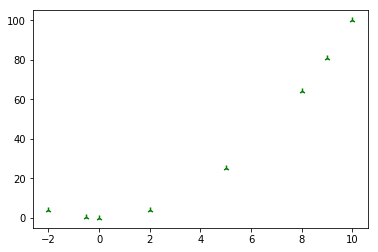

In [16]:
plt.scatter(X, Y, color ='green', marker = '2')

Список маркеров смотри [здесь](https://matplotlib.org/api/markers_api.html).

Если бы все строки кода со `scatter()` были в одной ячейке, то графики бы просто накладывались друг на друга.

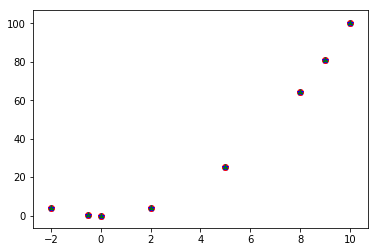

In [17]:
plt.scatter(X, Y, color ='red', marker = 'o')
plt.scatter(X, Y, color ='blue', marker = '*')
plt.scatter(X, Y, color ='green', marker = '2')

Если присмотреться, то на красных точках можно увидеть синие звездочки и зеленые треугольники. Чтобы такого не происходило (например, если вы создаете и сохраняете графики в цикле в пределах одной ячейки), нужно добавить строку с функцией `clf()`, которая очищает координатную плоскость для следующего графика (*clf* – от *clear figure*).

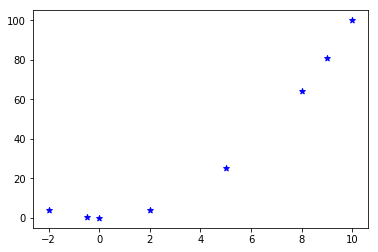

In [18]:
plt.scatter(X, Y, color ='red', marker = 'o')
plt.clf()
plt.scatter(X, Y, color ='blue', marker = '*')

На плоскости представлен только последний график с синими звездочками, красные точки от первого графика был стерты с помощью `clf()`.

При построении графиков стоит иметь в виду, что функция `plot()` всегда соединяет точки, причем последовательно, в том порядке, в котором они следуют в списках или массивах. Из-за этой особенности, допустив ошибку, связанную с заданием неверной области определения функции, можно получить некорректные графики. Построим для примера гиперболу.

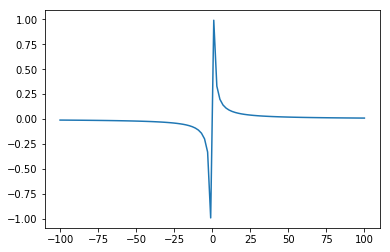

In [19]:
x = np.linspace(-100, 100, 100)
y = 1/x
plt.plot(x, y)

Полученный график не совсем похож на гиперболу! Как известно, в точке $x=0$ график уходит на бесконечность, линия при $x=0$ отсутствует. А здесь она есть! Избавимся от нее, построив график «по кусочкам».

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in true_divide
  """


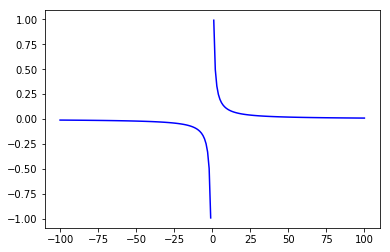

In [20]:
x1 = np.linspace(-100, 0, 100) # x < 0
y1 = 1/x1

x2 = np.linspace(0, 100, 100) # x > 0
y2 = 1/x2

plt.plot(x1, y1, 'blue')
plt.plot(x2, y2, 'blue')

В завершение попробуем построить целый рисунок (*figure*), состоящий сразу из нескольких графиков (подграфиков). Построим разные типы функций: $y=x^2$, $y=x^3$, $y=e^x$ и $y=|x|$. Сначала создадим соответствующие массивы значений:

In [21]:
x = np.linspace(-100, 100, 100)
y = x ** 2
z = x ** 3
r = np.exp(x)
m = abs(x)

Создадим рисунок (*figure*):

In [22]:
plt.figure(1)

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

А теперь будем добавлять в него графики, указывая их расположение. В функции `subplot()` указывается число. Первые две цифры ‒ это число графиков в строке и столбце (здесь 2 на 2, поэтому `22`). Последняя цифра ‒ это положение графика: левый верхний угол (`1`), правый верхний угол (`2`), левый нижний угол (`3`), правый нижний угол (`4`).

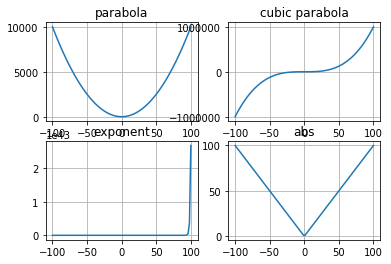

In [23]:
plt.subplot(221)
plt.plot(x, y) # x^2
plt.title('parabola')
plt.grid(True)

plt.subplot(222)
plt.plot(x, z) # x^3
plt.title('cubic parabola')
plt.grid(True)

plt.subplot(223)
plt.plot(x, r) # e^x
plt.title('exponent')
plt.grid(True)

plt.subplot(224)
plt.plot(x, m) # |x|
plt.title('abs')
plt.grid(True)

Строка `plt.grid(True)` нужна для того, чтобы на графиках были добавлены линии разметки, привычные нам "клеточки", которые позволяют удобным образом определять координаты точек на графике.

И напоследок: как сохранить график в файл. Очень просто. Например, так.

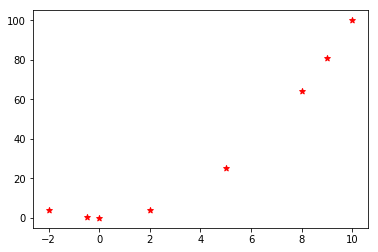

In [24]:
plt.figure(1)
plt.scatter(X, Y, color ='red', marker = '*')
plt.savefig('MyScatter.png') # ищем файл в рабочей папке (рядом с текущим ipynb-файлом)

Мы достаточно кратко обсудили возможности библиотеки `matplotlib`, но на этом её возможности не заканчиваются. Кому интересно, стоит посмотреть документацию по `matplotlib`, а также заглянуть в [галерею](https://matplotlib.org/gallery.html) с примерами графиков, которые можно адаптировать под свои задачи и данные.

Если кто-то привык работать в R и полюбил вид графиков `ggplot2`, можно установить [библиотеку](http://ggplot.yhathq.com/install.html) `ggplot` для Python. Кроме того, можно поработать с библиотекой [seaborn](https://seaborn.pydata.org/), она предоставляет много возможностей для построения статистических графиков, и выглядят ти графики тоже очень симпатично.

Если хочется более продвинутой интерактивной графики, связанной со статистическими моделями, стоит обратить внимание на библиотеку GraphLab. Она интересна не только графикой, но и другими вещами, но есть один минус: библиотека платная. Однако есть возможность получить доступ по учебной лицензии и даже продлевать ее, особенно, если учесть, что GraphLab используется в некоторых курсах на Coursera, что тоже облегачает получение доступа ([пример](https://www.coursera.org/learn/ml-foundations/home/welcome) такого курса).